In [2]:
import numpy as np
from astropy import constants as const
import astropy.units as u
import sympy as smp
import matplotlib.pyplot as plt

In [4]:
G = const.G.value # Grav constant in SI
AU = const.au.value # AU in m
M_sun = const.M_sun.value # Msun in kg

In [5]:
G, AU, M_sun 

(6.6743e-11, 149597870700.0, 1.988409870698051e+30)

In [6]:
a = 13.55 * AU # Semimajor axis of system (centered on O-star)

M_O = 29.27 * M_sun # O mass
a_O = 3.53 * AU  #Semimajor axis of O star centred on Barycentre
r_O = 0.355 * AU # Distance from WR to Barycenter at perihelion

M_WR = 10.31 * M_sun # WR mass
a_WR = 10.02 * AU #Semimajor axis of WR star centred on Barycentre
r_WR = 1.01 * AU # Distance from WR to Barycenter at perihelion

eccentricity = 0.8993

def velocity(a, e, r, P):
    b = a * np.sqrt(1 - e**2)
    return ((np.pi * a * b)/P) * 2/r 

P = 2895 * 24 * 60 * 60

v1 = velocity(a_WR, eccentricity, r_WR, P)
v2 = velocity(a_O, eccentricity, -r_O, P)

v1, v2

(163368.5891649507, -57686.68025767895)

In [7]:
P = 2895
a = 13.55
e = 0.8993
m1 = 29.27
m2 = 10.31 

v1, v2 = binary_periastron_velocity(a, e, P, m2, m1)
print(v1, v2)


NameError: name 'binary_periastron_velocity' is not defined

In [ ]:
def binary_periastron_velocity(a, e, P, m1, m2):
    """
    Function that computes the y component of the velocity of
    each star in a binary system at periastron (in cgs units).

    """

    M_sun = const.M_sun.cgs # M_sun in cgs units
    AU = const.au.cgs # 1AU in cgs units
    G = const.G.cgs # Gravitational constant in cgs units

    a = a*AU
    P = P * 24 * 60 * 60 * u.s.cgs # Converting period from days to seconds
    m1, m2 = m1*M_sun, m2*M_sun

    a1 = a / (1 + m1/m2)
    a2 = a - a1
    x1 = a1 * (1 - e)
    x2 = -a2 * (1 - e)
    vy_1 = (2 * np.pi * a1 **2 * np.sqrt(1 - e**2)) / (P*x1)
    vy_2 = (2 * np.pi * a2 **2 * np.sqrt(1 - e**2)) / (P*x2)

    return vy_1, vy_2




In [8]:
def binary_periastron_velocity(a, e, P, m1, m2):

    G = const.G.value

    a1 = a / (1 + m1/m2)
    a2 = a - a1

    x1 = a1 * (1 - e)
    x2 = -a2 * (1 - e)

    mu = G * (m1 + m2)

    vy_1 = (2 * np.pi * a1 **2 * np.sqrt(1 - e**2)) / (P*x1)
    vy_2 = (2 * np.pi * a2 **2 * np.sqrt(1 - e**2)) / (P*x2)

    return vy_1, vy_2



In [9]:
P = 2895 * 24 * 60 * 60
a = 13.55 * AU
e = 0.8993
m1 = 29.27 * M_sun
m2 = 10.31 * M_sun


v1, v2 = binary_periastron_velocity(a, e, P, m2, m1)
print(v1, v2)

163535.20002307536 -57603.276810314586


In [10]:
# P = 80 * 24 * 60 * 60
# a = 1.68 * AU
# ecc = 0.559

# r1 = 2.915e10
# m1 = 72 * M_sun
# m2 = 25.7 * M_sun


# a2 = a / (1+m2/m1)
# a1 = a - a2

# r2 = 8.168e10


# v1 = velocity(a1, ecc, r1, P)
# v2 = velocity(a2, ecc, r2, P)

# v1, v2


In [11]:
# def vel(m1, m2, a, r, eps, P):
#     v =  (2*np.pi * a**2)/(P*r) * np.sqrt(1-eps**2) 
#     return v

# v1 = vel(m1,m2,a1,r1,ecc, P)
# v2 = vel(m1,m2,a2,r2,ecc, P)

# v1, v2

In [12]:
def vel(m1, m2, a, r, e):
    return np.sqrt(a*(m1+m2)*(1-e**2)) / r


In [13]:
v1 = vel(m1,m2, a1, r1, ecc)
v2 = vel(m1,m2, a2, r2, ecc)


NameError: name 'a1' is not defined

In [14]:
v1, v2

(163535.20002307536, -57603.276810314586)

In [15]:
# v1 = vel(M_WR, M_O, a, r_WR + r_O, eccentricity)
# v2 = vel(M_WR, M_O, a_O, r_O, eccentricity)

In [16]:
# v1

In [17]:
# print(M_WR/M_O * v1)
# print((1-M_WR/M_O) * v1)

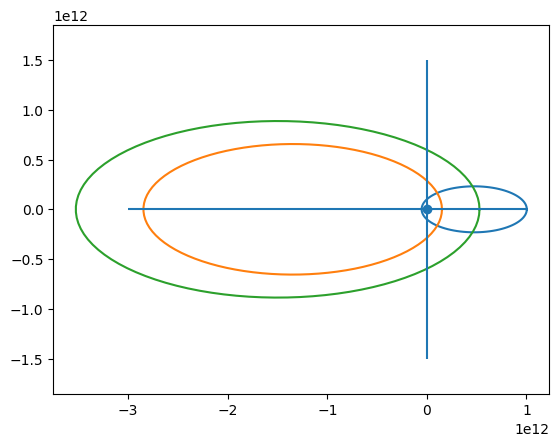

In [27]:
plt.scatter(0,0)

t = np.linspace(0,2*np.pi, 100)

def plot_elipse(u, v, a, epsilon, t):
    plt.plot( u+a*np.cos(t) , v + a*np.sqrt(1-epsilon**2) * np.sin(t) )

    plt.axis('equal')

# plt.plot(r_O + a_O * np.cos(t), (a_O * np.sqrt(1-eccentricity**2)) * np.sin(t))

# plt.plot(- r_WR + a_WR * np.cos(t), (a_WR * np.sqrt(1-eccentricity**2)) * np.sin(t))


plot_elipse(a_O-r_O, 0, a_O, eccentricity, t)
plot_elipse(-a_WR+r_WR, 0, a_WR, eccentricity, t)
plot_elipse(-a+a_O, 0, a_WR + a_O, eccentricity, t)

plt.vlines(0, -1.5e12, 1.5e12)
plt.hlines(0, -3e12, 1e12)



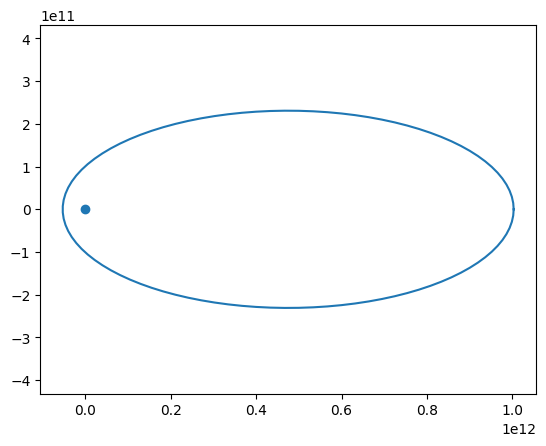

In [263]:
plot_elipse(a_O-r_O, 0, a_O, eccentricity, t)
plt.scatter(0, 0)

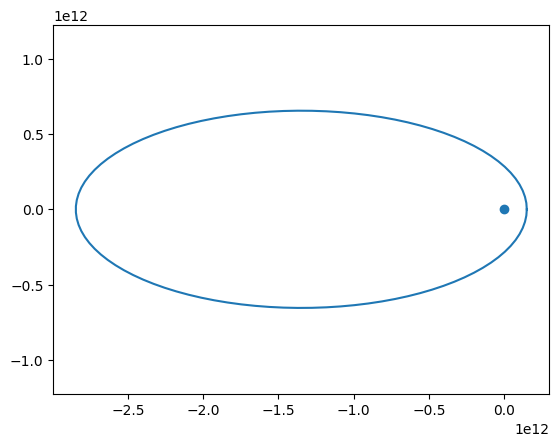

In [264]:
plot_elipse(-a_WR+r_WR, 0, a_WR, eccentricity, t)
plt.scatter(0, 0)

From Keplers second law it is true that for each mass orbiting the barycentre:

$$ \frac{dA}{dt} = \frac{r^2}{2} \frac{d\theta}{dt} $$

It is also known that the velocity of each mass depends on the rate of change of the angle $\theta$ made with the origin

$$ v_\theta  = r \frac{d \theta}{dt} = r \frac{dA}{dt} \frac{2}{r^2}$$



$$ v_1 = \frac{\pi a_1 b_1}{P} \frac{2}{r} = \frac{2\pi a_1^2 \sqrt{1-e^2}}{Pr}$$

$$ a_{sys}^3 = \frac{G(M_1+M_2) P^2}{4\pi^2} \iff P = \sqrt{\frac{4\pi^2 a_{sys}^3}{G(M_1+M_2)}}$$

$$ v = \frac{a_1^2\sqrt{1-e^2}}{r}\frac{G(M_1+M_2)}{a_{sys}^{3/2}} $$

$$ v = \frac{\sqrt{\mu(1-e^2)}}{r} \frac{a_1^2}{a_{sys}^{3/2}} $$


